# Red Neuronal Multicapa con TensorFlow
Se cuenta con la antiguedad y el precio de los varios carrios, estos estan clasificados por carro normal (tipo = 0) y por carro clasico (tipo = 1)

# Leer los datos (carros.csv) con Pandas

In [1]:
import pandas as pd 
data = pd.read_csv('Datasets/carros.csv')
data

,antiguedad,precio,tipo
0,0.0,1.0,0
1,0.1,1.0,0
2,0.2,1.0,0
3,0.3,1.0,0
4,0.4,1.0,0
...,...,...,...
116,0.6,0.0,1
117,0.7,0.0,1
118,0.8,0.0,1
119,0.9,0.0,1


In [2]:
X = data.iloc[:, :-1]
X

,antiguedad,precio
0,0.0,1.0
1,0.1,1.0
2,0.2,1.0
3,0.3,1.0
4,0.4,1.0
...,...,...
116,0.6,0.0
117,0.7,0.0
118,0.8,0.0
119,0.9,0.0


In [3]:
y = data.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
116    1
117    1
118    1
119    1
120    1
Name: tipo, Length: 121, dtype: int64

# Mostrar los datos en gráfico

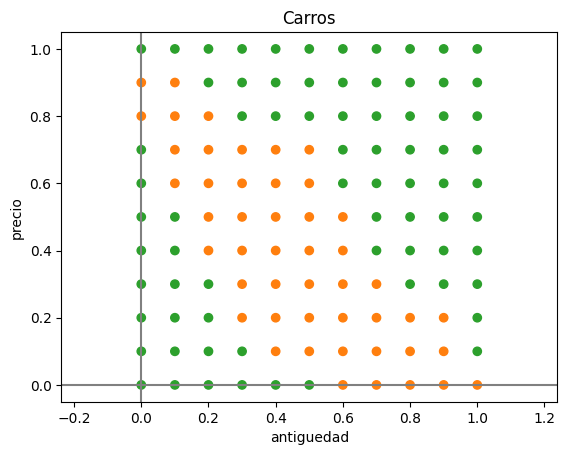

In [4]:
import matplotlib.pyplot as plt

colors = [ 'C1' if i == 1 else 'C2' for i in y ]
plt.title('Carros')
plt.axhline(color = 'gray')
plt.axvline(color = 'gray')
plt.xlabel('antiguedad')
plt.ylabel('precio')
plt.axis('equal')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = colors) 

# Crear una red neuronal con TensorFlow

In [5]:
from tensorflow import keras
from keras.layers import Dense

model = keras.Sequential([
    Dense(128, activation='relu', input_shape=[2]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\juanp\Programacion\Redes-Neuronales-Notebook\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import tensorflow as tf

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\juanp\Programacion\Redes-Neuronales-Notebook\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.fit(X, y, epochs=1000, batch_size=60)

NameError: name 'X' is not defined